**We first install all the required libraries**

In [3]:
# Data Handling
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Handling Imbalanced Data 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Jupyter Notebook Configuration
%matplotlib inline
sns.set_style("darkgrid")


**Import the dataset from excel**

In [5]:
df = pd.read_excel("titanic3.xls")

# Display the first few rows to make sure the excel was readed correctly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


• Now we are going to perform some purely statistical operations to understand better the entity of the dataset, including outliers, missing data, etc.

In [ ]:
df.head()  

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
df.describe() 

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [ ]:
df.isnull().sum() # Check how many values are missing

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

• Let's understand what percentage of people actually survived by seeing it visually

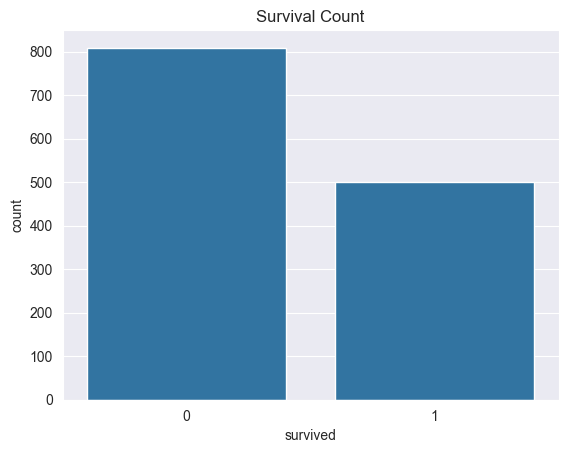

In [11]:
sns.countplot(x="survived", data=df)
plt.title("Survival Count")
plt.show()

In [16]:
# Count duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


• Let's now see the age distribution

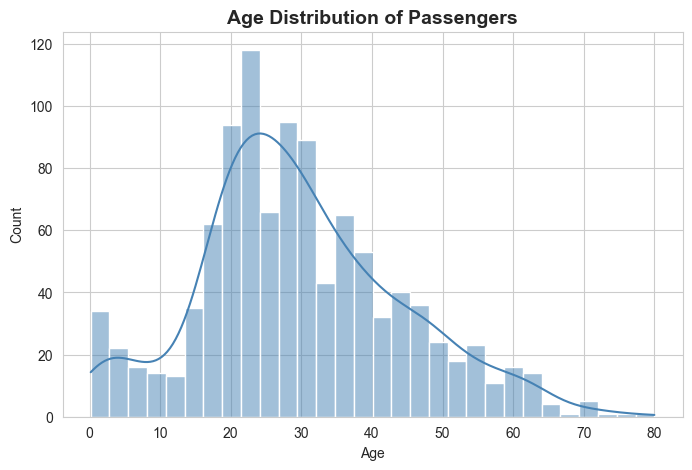

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(df["age"], bins=30, kde=True, color="steelblue")
plt.title("Age Distribution of Passengers", fontsize=14, fontweight="bold")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


• Now let's see if there are any correlation between different classes of the dataset

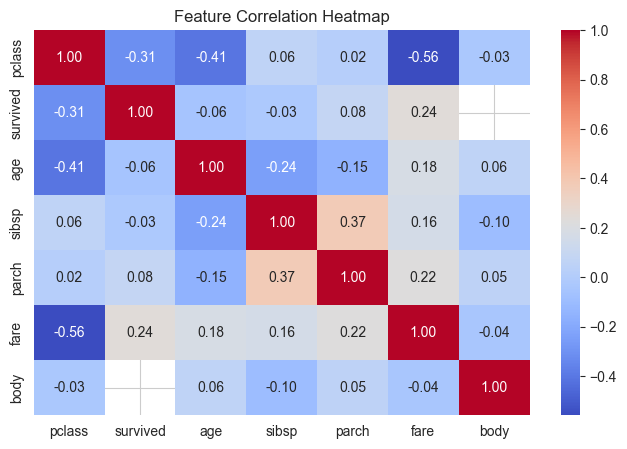

In [21]:
plt.figure(figsize=(8,5))

# Select only numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Create the heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Feature Correlation Heatmap")
plt.show()


From this we can derive different intuitions which for now I think are the most relevant information:

- There is a strong negative correlation (-0.56) between the fare and the class of the passenger. This makes perfectly sense since the higher the class ( 1st, 2nd, 3rd...), the less you pay.

- There is a moderate positive correlation (0.37) between the people who have siblings/spouses and the people who have parents/children, which again makes perfectly sense.

- There is one last notable correlation, the one between the fare and the people that survived, which is positive (0.24). From here we can deduce that the people that payed more, so the people that were in higher classes were more likely to survive.